In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
data = pd.read_csv("/Users/jiteshyadav/Desktop/customer_churn_prediction/customer_churn_dataset-training-master.csv")

In [44]:
print(data.head())

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

In [45]:
print("column name:",data.columns)

column name: Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


In [46]:
df = pd.DataFrame(data)

type(df)


pandas.core.frame.DataFrame

In [47]:
# This will remove the 'CustomerID' column in place (without needing reassignment)
df.drop(columns='CustomerID', inplace=True)


In [48]:
#print("column", data.columns)
list(df.columns)

#formating all the columns " " with "_"
new_column_names = {col : col.replace(' ','_') for col in df.columns}
df = df.rename(columns = new_column_names)
list(df.columns)

['Age',
 'Gender',
 'Tenure',
 'Usage_Frequency',
 'Support_Calls',
 'Payment_Delay',
 'Subscription_Type',
 'Contract_Length',
 'Total_Spend',
 'Last_Interaction',
 'Churn']

In [49]:
# Find all the null values
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Age                  1
Gender               1
Tenure               1
Usage_Frequency      1
Support_Calls        1
Payment_Delay        1
Subscription_Type    1
Contract_Length      1
Total_Spend          1
Last_Interaction     1
Churn                1
dtype: int64


In [50]:
# Remove rows with missing values
df_cleaned = df.dropna()
# Remove columns with missing values
df_cleaned = df.dropna(axis=1)
# Remove rows with missing values in place
df.dropna(inplace=True)


In [51]:
# Check if there are any missing values left
print("Missing values in each column after cleaning:")
print(df.isna().sum())


Missing values in each column after cleaning:
Age                  0
Gender               0
Tenure               0
Usage_Frequency      0
Support_Calls        0
Payment_Delay        0
Subscription_Type    0
Contract_Length      0
Total_Spend          0
Last_Interaction     0
Churn                0
dtype: int64


In [52]:
# Remove all rows with any null (NaN) values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print(df_cleaned)


         Age  Gender  Tenure  Usage_Frequency  Support_Calls  Payment_Delay  \
0       30.0  Female    39.0             14.0            5.0           18.0   
1       65.0  Female    49.0              1.0           10.0            8.0   
2       55.0  Female    14.0              4.0            6.0           18.0   
3       58.0    Male    38.0             21.0            7.0            7.0   
4       23.0    Male    32.0             20.0            5.0            8.0   
...      ...     ...     ...              ...            ...            ...   
440828  42.0    Male    54.0             15.0            1.0            3.0   
440829  25.0  Female     8.0             13.0            1.0           20.0   
440830  26.0    Male    35.0             27.0            1.0            5.0   
440831  28.0    Male    55.0             14.0            2.0            0.0   
440832  31.0    Male    48.0             20.0            1.0           14.0   

       Subscription_Type Contract_Length  Total_Spe

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage_Frequency    440832 non-null  float64
 4   Support_Calls      440832 non-null  float64
 5   Payment_Delay      440832 non-null  float64
 6   Subscription_Type  440832 non-null  object 
 7   Contract_Length    440832 non-null  object 
 8   Total_Spend        440832 non-null  float64
 9   Last_Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [54]:
# Find the number of duplicated rows
num_duplicates = df_cleaned.duplicated().sum()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {num_duplicates}")


Number of duplicated rows: 0


In [55]:
# Descriptive statistics for numerical columns
print(df_cleaned.describe())


                 Age         Tenure  Usage_Frequency  Support_Calls  \
count  440832.000000  440832.000000    440832.000000  440832.000000   
mean       39.373153      31.256336        15.807494       3.604437   
std        12.442369      17.255727         8.586242       3.070218   
min        18.000000       1.000000         1.000000       0.000000   
25%        29.000000      16.000000         9.000000       1.000000   
50%        39.000000      32.000000        16.000000       3.000000   
75%        48.000000      46.000000        23.000000       6.000000   
max        65.000000      60.000000        30.000000      10.000000   

       Payment_Delay    Total_Spend  Last_Interaction          Churn  
count  440832.000000  440832.000000     440832.000000  440832.000000  
mean       12.965722     631.616223         14.480868       0.567107  
std         8.258063     240.803001          8.596208       0.495477  
min         0.000000     100.000000          1.000000       0.000000  
25%  

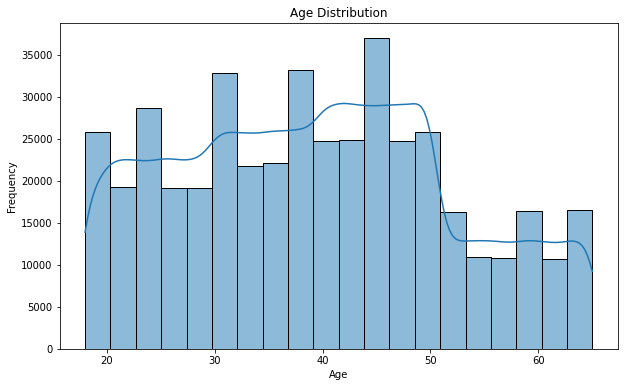

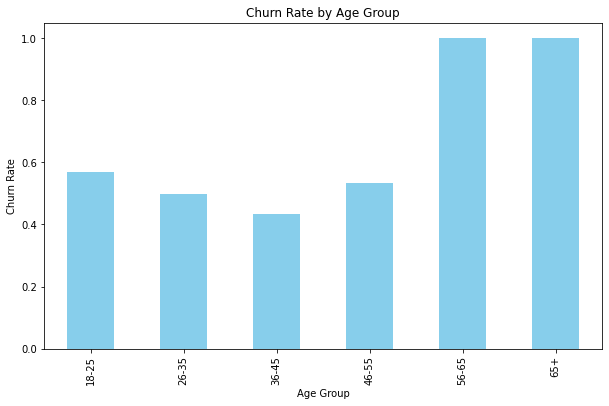

Age_Group
18-25    0.568196
26-35    0.498719
36-45    0.433436
46-55    0.532919
56-65    1.000000
65+      1.000000
Name: Churn, dtype: float64


In [56]:
# EDA analysis
# 1. Age Distribution and Churn Rate

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Churn rate by age group (age bins)
# Let's create age bins to analyze churn rates within groups
age_bins = [18, 25, 35, 45, 55, 65, 100]  # Example age ranges
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate churn rate within each age group
age_churn_rate = df.groupby('Age_Group')['Churn'].mean()

# Plot churn rate by age group
plt.figure(figsize=(10, 6))
age_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()

# Output the churn rate by age group
print(age_churn_rate)


/var/folders/1w/cm310y190xx4p4njs8rdwltc0000gn/T/ipykernel_1427/2622459079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


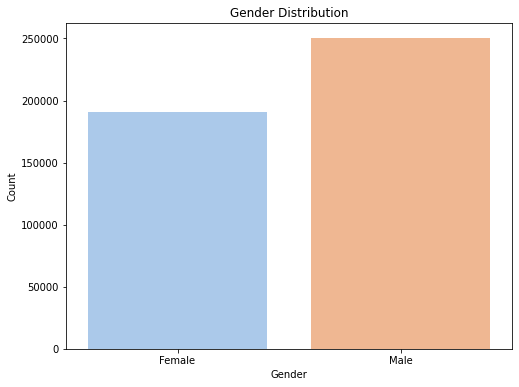

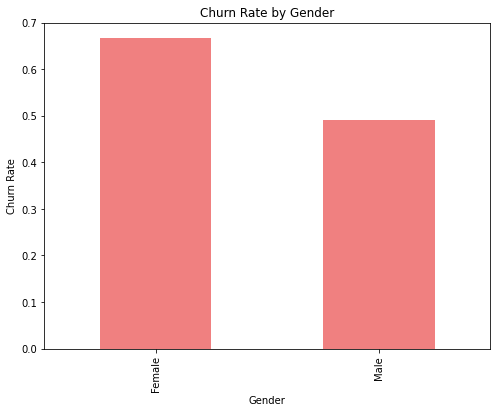

Gender
Female    0.666691
Male      0.491269
Name: Churn, dtype: float64


In [57]:
# 2. Gender Analysis and its relationship with churn

# 1. Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. Churn rate by gender
gender_churn_rate = df.groupby('Gender')['Churn'].mean()

# Plot churn rate by gender
plt.figure(figsize=(8, 6))
gender_churn_rate.plot(kind='bar', color='lightcoral')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

# Output the churn rate by gender
print(gender_churn_rate)


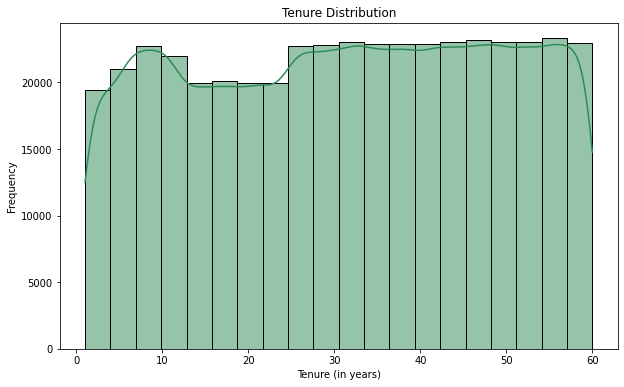

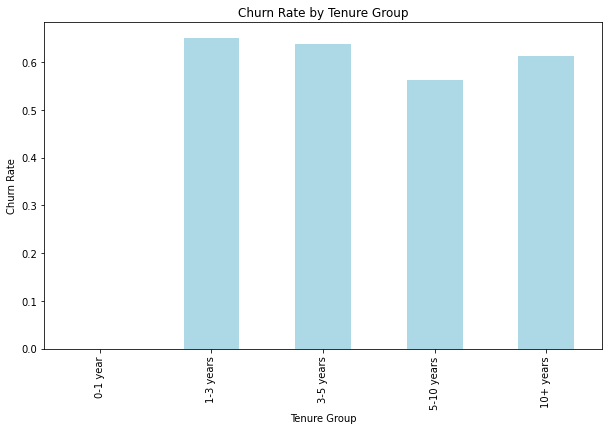

Tenure_Group
0-1 year           NaN
1-3 years     0.650362
3-5 years     0.637948
5-10 years    0.561406
10+ years     0.611831
Name: Churn, dtype: float64


In [58]:
# 3. Tenure and Churn

# 1. Plot the tenure distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], bins=20, kde=True, color='seagreen')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (in years)')
plt.ylabel('Frequency')
plt.show()

# 2. Churn rate by tenure group
# Let's create tenure bins to analyze churn rates within groups
tenure_bins = [0, 1, 3, 5, 10, 20]  # Example tenure ranges
tenure_labels = ['0-1 year', '1-3 years', '3-5 years', '5-10 years', '10+ years']
df['Tenure_Group'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Calculate churn rate within each tenure group
tenure_churn_rate = df.groupby('Tenure_Group')['Churn'].mean()

# Plot churn rate by tenure group
plt.figure(figsize=(10, 6))
tenure_churn_rate.plot(kind='bar', color='lightblue')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.show()

# Output the churn rate by tenure group
print(tenure_churn_rate)


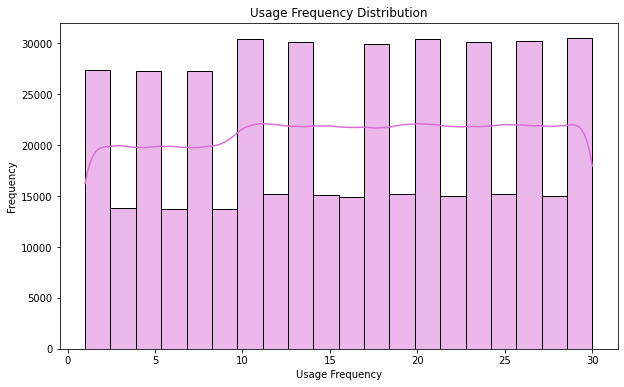

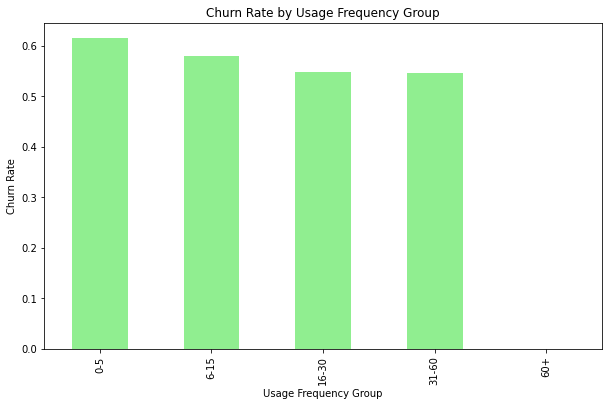

Usage_Frequency_Group
0-5      0.615264
6-15     0.579511
16-30    0.548904
31-60    0.547138
60+           NaN
Name: Churn, dtype: float64


In [59]:
# 4. Usage Frequency and its relationship with churn

# 1. Plot the usage frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Usage_Frequency'], bins=20, kde=True, color='orchid')
plt.title('Usage Frequency Distribution')
plt.xlabel('Usage Frequency')
plt.ylabel('Frequency')
plt.show()

# 2. Churn rate by usage frequency group
# Let's create usage frequency bins to analyze churn rates within groups
usage_bins = [0, 5, 15, 30, 60, 100]  # Example frequency ranges (e.g., 0-5, 5-15, etc.)
usage_labels = ['0-5', '6-15', '16-30', '31-60', '60+']
df['Usage_Frequency_Group'] = pd.cut(df['Usage_Frequency'], bins=usage_bins, labels=usage_labels, right=False)

# Calculate churn rate within each usage frequency group
usage_churn_rate = df.groupby('Usage_Frequency_Group')['Churn'].mean()

# Plot churn rate by usage frequency group
plt.figure(figsize=(10, 6))
usage_churn_rate.plot(kind='bar', color='lightgreen')
plt.title('Churn Rate by Usage Frequency Group')
plt.xlabel('Usage Frequency Group')
plt.ylabel('Churn Rate')
plt.show()

# Output the churn rate by usage frequency group
print(usage_churn_rate)


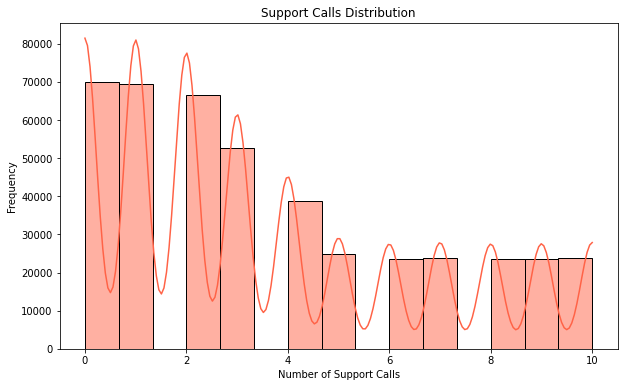

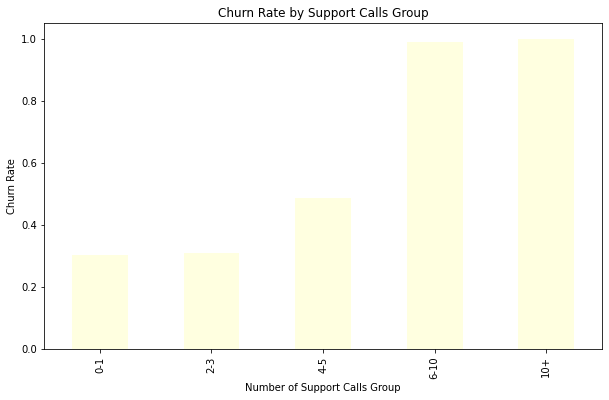

Support_Calls_Group
0-1     0.302826
2-3     0.309445
4-5     0.487828
6-10    0.988982
10+     1.000000
Name: Churn, dtype: float64


In [60]:
# 5.Support Calls and Churn

# 1. Plot the support calls distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Support_Calls'], bins=15, kde=True, color='tomato')
plt.title('Support Calls Distribution')
plt.xlabel('Number of Support Calls')
plt.ylabel('Frequency')
plt.show()

# 2. Churn rate by number of support calls group
# Let's create support calls bins to analyze churn rates within groups
support_calls_bins = [0, 1, 3, 5, 10, 20]  # Example support calls ranges
support_calls_labels = ['0-1', '2-3', '4-5', '6-10', '10+']
df['Support_Calls_Group'] = pd.cut(df['Support_Calls'], bins=support_calls_bins, labels=support_calls_labels, right=False)

# Calculate churn rate within each support call group
support_calls_churn_rate = df.groupby('Support_Calls_Group')['Churn'].mean()

# Plot churn rate by support call group
plt.figure(figsize=(10, 6))
support_calls_churn_rate.plot(kind='bar', color='lightyellow')
plt.title('Churn Rate by Support Calls Group')
plt.xlabel('Number of Support Calls Group')
plt.ylabel('Churn Rate')
plt.show()

# Output the churn rate by support calls group
print(support_calls_churn_rate)


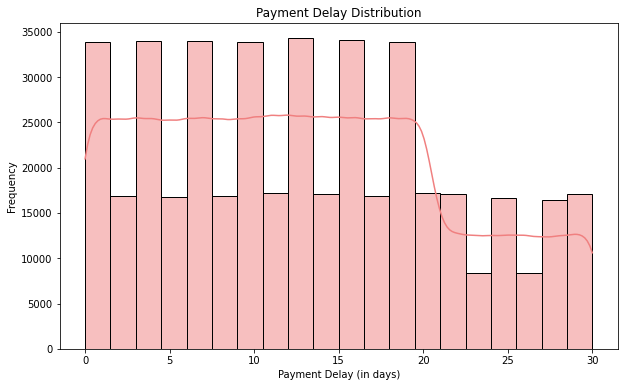

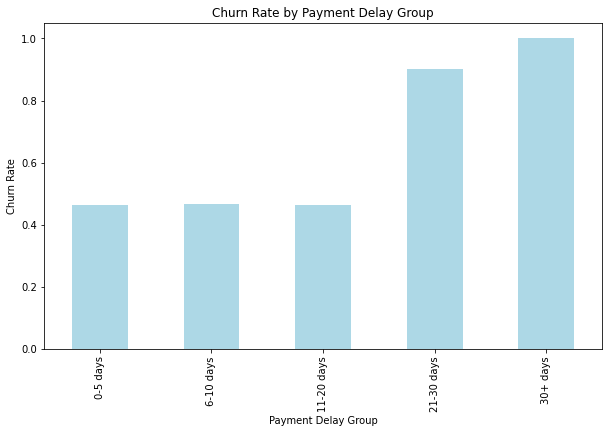

Payment_Delay_Group
0-5 days      0.464136
6-10 days     0.466811
11-20 days    0.464804
21-30 days    0.900891
30+ days      1.000000
Name: Churn, dtype: float64


In [61]:
# 6. Payment Delay and its relationship with churn

# 1. Plot the payment delay distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Payment_Delay'], bins=20, kde=True, color='lightcoral')
plt.title('Payment Delay Distribution')
plt.xlabel('Payment Delay (in days)')
plt.ylabel('Frequency')
plt.show()

# 2. Churn rate by payment delay group
# Let's create payment delay bins to analyze churn rates within groups
payment_delay_bins = [0, 5, 10, 20, 30, 60]  # Example payment delay ranges
payment_delay_labels = ['0-5 days', '6-10 days', '11-20 days', '21-30 days', '30+ days']
df['Payment_Delay_Group'] = pd.cut(df['Payment_Delay'], bins=payment_delay_bins, labels=payment_delay_labels, right=False)

# Calculate churn rate within each payment delay group
payment_delay_churn_rate = df.groupby('Payment_Delay_Group')['Churn'].mean()

# Plot churn rate by payment delay group
plt.figure(figsize=(10, 6))
payment_delay_churn_rate.plot(kind='bar', color='lightblue')
plt.title('Churn Rate by Payment Delay Group')
plt.xlabel('Payment Delay Group')
plt.ylabel('Churn Rate')
plt.show()

# Output the churn rate by payment delay group
print(payment_delay_churn_rate)


/var/folders/1w/cm310y190xx4p4njs8rdwltc0000gn/T/ipykernel_1427/2104030065.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Subscription_Type', palette='Set2')


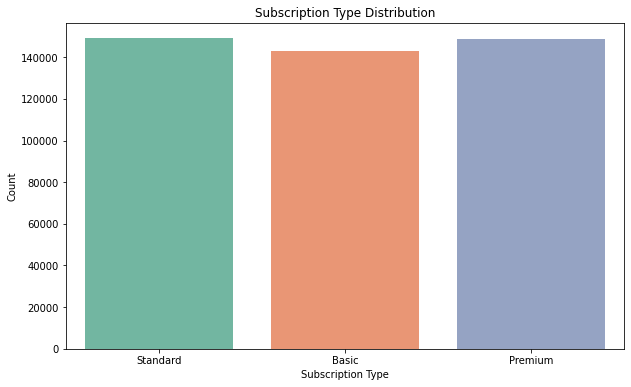

/var/folders/1w/cm310y190xx4p4njs8rdwltc0000gn/T/ipykernel_1427/2104030065.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Contract_Length', palette='Set3')


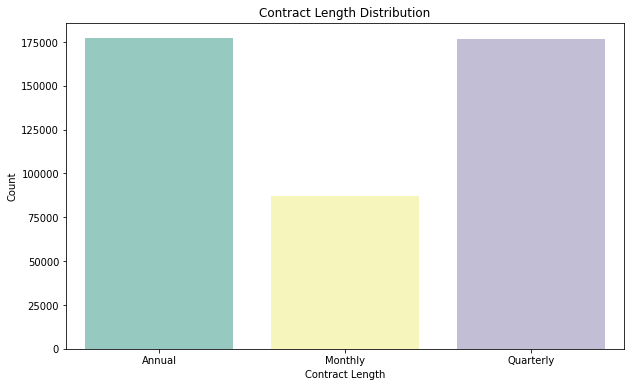

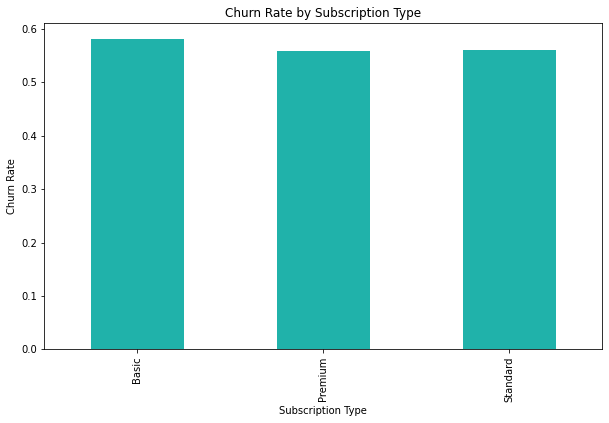

Subscription_Type
Basic       0.581782
Premium     0.559417
Standard    0.560700
Name: Churn, dtype: float64


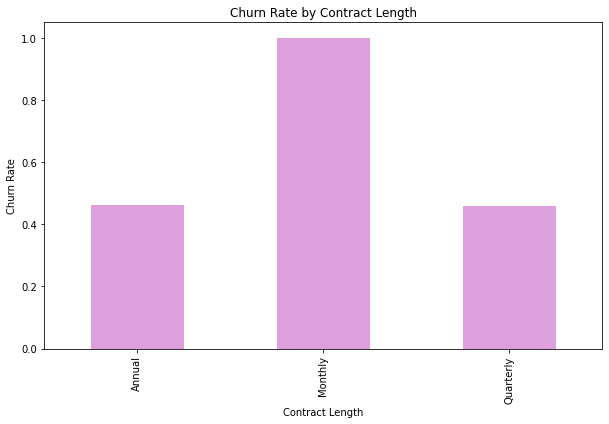

Contract_Length
Annual       0.460761
Monthly      1.000000
Quarterly    0.460256
Name: Churn, dtype: float64


In [62]:
# 7. Subscription Type and Contract Length

# 1. Subscription Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subscription_Type', palette='Set2')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

# 2. Contract Length Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract_Length', palette='Set3')
plt.title('Contract Length Distribution')
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.show()

# 3. Churn rate by subscription type
subscription_churn_rate = df.groupby('Subscription_Type')['Churn'].mean()

# Plot churn rate by subscription type
plt.figure(figsize=(10, 6))
subscription_churn_rate.plot(kind='bar', color='lightseagreen')
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate')
plt.show()

# Output the churn rate by subscription type
print(subscription_churn_rate)

# 4. Churn rate by contract length
contract_length_churn_rate = df.groupby('Contract_Length')['Churn'].mean()

# Plot churn rate by contract length
plt.figure(figsize=(10, 6))
contract_length_churn_rate.plot(kind='bar', color='plum')
plt.title('Churn Rate by Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Churn Rate')
plt.show()

# Output the churn rate by contract length
print(contract_length_churn_rate)


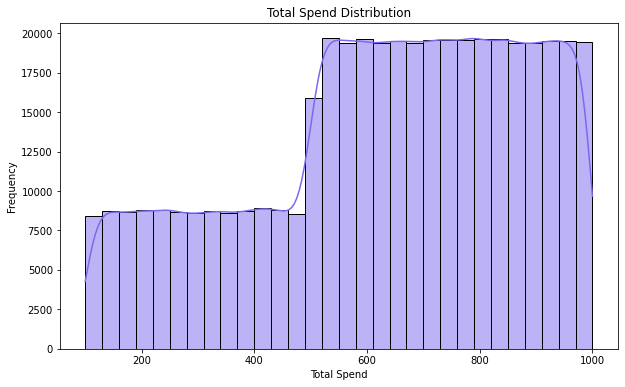

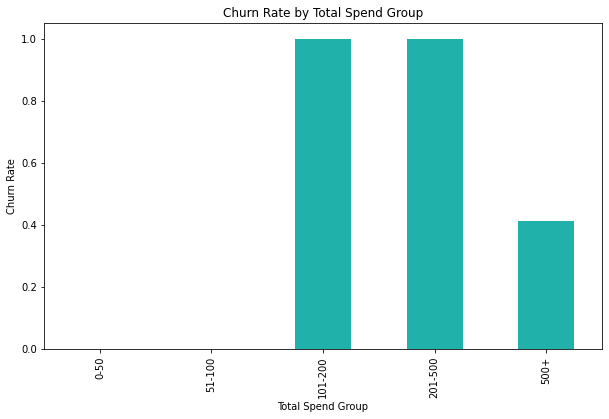

Total_Spend_Group
0-50            NaN
51-100          NaN
101-200    1.000000
201-500    1.000000
500+       0.412701
Name: Churn, dtype: float64


In [63]:
# 8. Total Spend and Churn

# 1. Plot the total spend distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Spend'], bins=30, kde=True, color='mediumslateblue')
plt.title('Total Spend Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

# 2. Churn rate by total spend group
# Let's create total spend bins to analyze churn rates within groups
total_spend_bins = [0, 50, 100, 200, 500, 1000]  # Example total spend ranges
total_spend_labels = ['0-50', '51-100', '101-200', '201-500', '500+']
df['Total_Spend_Group'] = pd.cut(df['Total_Spend'], bins=total_spend_bins, labels=total_spend_labels, right=False)

# Calculate churn rate within each total spend group
total_spend_churn_rate = df.groupby('Total_Spend_Group')['Churn'].mean()

# Plot churn rate by total spend group
plt.figure(figsize=(10, 6))
total_spend_churn_rate.plot(kind='bar', color='lightseagreen')
plt.title('Churn Rate by Total Spend Group')
plt.xlabel('Total Spend Group')
plt.ylabel('Churn Rate')
plt.show()

# Output the churn rate by total spend group
print(total_spend_churn_rate)


In [64]:
# Check for missing values
print("Missing values in each column:")
print(df.isna().sum())


Missing values in each column:
Age                           0
Gender                        0
Tenure                        0
Usage_Frequency               0
Support_Calls                 0
Payment_Delay                 0
Subscription_Type             0
Contract_Length               0
Total_Spend                   0
Last_Interaction              0
Churn                         0
Age_Group                     0
Tenure_Group             309100
Usage_Frequency_Group         0
Support_Calls_Group           0
Payment_Delay_Group           0
Total_Spend_Group           111
dtype: int64


In [67]:
# Drop rows where 'Tenure_Group' or 'Total_Spend_Group' is missing
df.dropna(subset=['Tenure_Group', 'Total_Spend_Group'], inplace=True)


In [68]:
# Check for missing values
print("Missing values in each column:")
print(df.isna().sum())


Missing values in each column:
Age                      0
Gender                   0
Tenure                   0
Usage_Frequency          0
Support_Calls            0
Payment_Delay            0
Subscription_Type        0
Contract_Length          0
Total_Spend              0
Last_Interaction         0
Churn                    0
Age_Group                0
Tenure_Group             0
Usage_Frequency_Group    0
Support_Calls_Group      0
Payment_Delay_Group      0
Total_Spend_Group        0
dtype: int64


In [69]:
# Export cleaned data to CSV
df.to_csv('/Users/jiteshyadav/Desktop/customer_churn_prediction/cleaned_data.csv', index=False)
